In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# CSV 파일에서 데이터 읽기
df = pd.read_csv('../data/NASDAQ_DT_FC_STK_QUT.csv', encoding='cp949')
df.head()

,trd_dt,tck_iem_cd,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty
0,20230103,NVDA,148.5100,149.9600,140.9600,143.1500,40127658.0,0.0,0.0
1,20230103,APLT,0.7535,0.7900,0.7308,0.7522,63714.0,19658.0,44056.0
2,20230103,ANY,1.8900,2.0293,1.8354,1.9600,24896.4,0.0,0.0
3,20230103,CLRB,1.6600,1.7200,1.6300,1.6300,21212.0,16444.0,4768.0
4,20230103,NYMTM,18.4300,18.7400,18.4300,18.7000,8061.0,0.0,0.0


In [21]:
data = df[:222183]  # 2023년 1월 부터 2023년 4월 까지 데이터
data

,trd_dt,tck_iem_cd,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty
0,20230103,NVDA,148.5100,149.960000,140.9600,143.1500,40127658.0,0.0,0.0
1,20230103,APLT,0.7535,0.790000,0.7308,0.7522,63714.0,19658.0,44056.0
2,20230103,ANY,1.8900,2.029300,1.8354,1.9600,24896.4,0.0,0.0
3,20230103,CLRB,1.6600,1.720000,1.6300,1.6300,21212.0,16444.0,4768.0
4,20230103,NYMTM,18.4300,18.740000,18.4300,18.7000,8061.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
222178,20230428,EFTR,0.4500,0.490000,0.4024,0.4700,334226.0,111938.0,222288.0
222179,20230428,SPRC,0.7100,0.715265,0.6500,0.6989,104417.0,51056.0,53361.0
222180,20230428,ANY,3.2683,3.268300,3.0940,3.1493,42494.4,0.0,0.0
222181,20230428,CHRD,138.9500,143.505000,138.0000,142.3300,538840.0,0.0,0.0


In [22]:
data.shape # (222183, 9)

(222183, 9)

In [23]:
data.describe() # 데이터의 통계정보 확인

,trd_dt,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty
count,2.221830e+05,222183.000000,222183.000000,222183.000000,222183.000000,2.221830e+05,2.221830e+05,2.221830e+05
mean,2.023027e+07,31.311511,31.862517,30.775300,31.331782,1.274322e+06,5.065642e+05,5.418488e+05
std,1.104966e+02,82.779123,83.934743,81.811963,82.984611,7.183658e+06,3.186746e+06,3.745423e+06
min,2.023010e+07,0.032200,0.000000,0.000000,0.033500,2.409700e+01,0.000000e+00,0.000000e+00
25%,2.023020e+07,2.380000,2.480000,2.280000,2.370000,4.406850e+04,3.530000e+03,3.918000e+03
50%,2.023030e+07,9.090000,9.370000,8.810000,9.075000,1.895730e+05,5.180100e+04,5.099500e+04
75%,2.023033e+07,28.140000,28.680000,27.585000,28.150000,6.822665e+05,2.494410e+05,2.566560e+05
max,2.023043e+07,2697.750000,2721.849900,2687.805000,2696.680000,8.392373e+08,3.041121e+08,5.351252e+08


In [24]:
data.isnull().sum() # 결측치 확인

trd_dt                 0
tck_iem_cd             0
gts_iem_ong_pr         0
gts_iem_hi_pr          0
gts_iem_low_pr         0
gts_iem_end_pr         0
gts_acl_trd_qty        0
gts_sll_cns_sum_qty    0
gts_byn_cns_sum_qty    0
dtype: int64

In [25]:
# 중복 제거
data.drop_duplicates(subset=None, inplace=True)
data

C:\Users\Playdata\AppData\Local\Temp\ipykernel_9136\1212856471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset=None, inplace=True)


,trd_dt,tck_iem_cd,gts_iem_ong_pr,gts_iem_hi_pr,gts_iem_low_pr,gts_iem_end_pr,gts_acl_trd_qty,gts_sll_cns_sum_qty,gts_byn_cns_sum_qty
0,20230103,NVDA,148.5100,149.960000,140.9600,143.1500,40127658.0,0.0,0.0
1,20230103,APLT,0.7535,0.790000,0.7308,0.7522,63714.0,19658.0,44056.0
2,20230103,ANY,1.8900,2.029300,1.8354,1.9600,24896.4,0.0,0.0
3,20230103,CLRB,1.6600,1.720000,1.6300,1.6300,21212.0,16444.0,4768.0
4,20230103,NYMTM,18.4300,18.740000,18.4300,18.7000,8061.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
222178,20230428,EFTR,0.4500,0.490000,0.4024,0.4700,334226.0,111938.0,222288.0
222179,20230428,SPRC,0.7100,0.715265,0.6500,0.6989,104417.0,51056.0,53361.0
222180,20230428,ANY,3.2683,3.268300,3.0940,3.1493,42494.4,0.0,0.0
222181,20230428,CHRD,138.9500,143.505000,138.0000,142.3300,538840.0,0.0,0.0


C:\Users\Playdata\AppData\Local\Temp\ipykernel_9136\1275746427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_Slope'] = (data['gts_iem_end_pr'] - data['gts_iem_ong_pr']) / data['gts_iem_ong_pr']


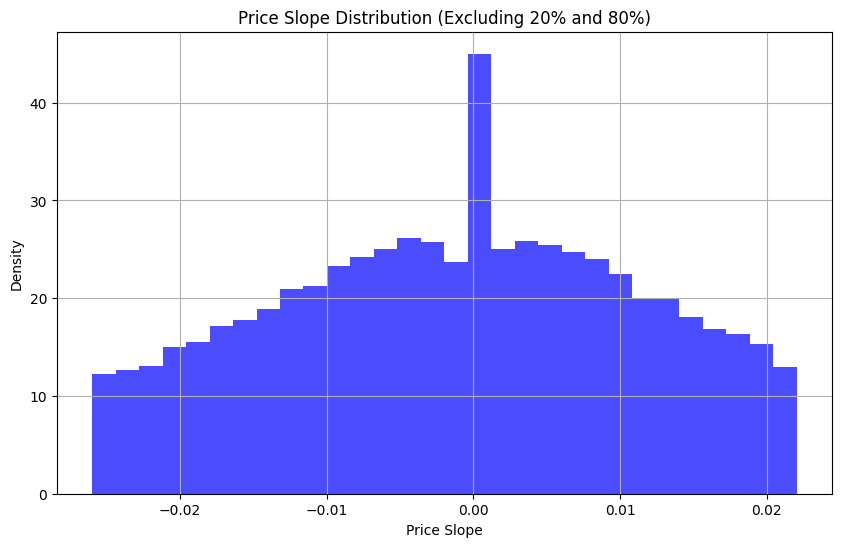

In [26]:
# 시가와 종가의 기울기 계산
data['Price_Slope'] = (data['gts_iem_end_pr'] - data['gts_iem_ong_pr']) / data['gts_iem_ong_pr']

# 80% 이상, 20% 이하 데이터 제외
percentile_20 = np.percentile(data['Price_Slope'], 20)
percentile_80 = np.percentile(data['Price_Slope'], 80)
filtered_df = data[(data['Price_Slope'] >= percentile_20) & (data['Price_Slope'] <= percentile_80)]

# 정규분포 확인
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Price_Slope'], bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Price Slope')
plt.ylabel('Density')
plt.title('Price Slope Distribution (Excluding 20% and 80%)')
plt.grid(True)
plt.show()
